# TFM JULIAN MARCOS VÁZQUEZ

# ANÁLISIS CARACTERÍSTICAS DE LOS JUGADORES DEL FIFA 2019

# 2. VISUALIZACIÓN DE ALGUNOS DATOS CURIOSOS DEL DATASET 

In [1]:
# Importo los paquetes necesarios para empezar a trabajar con el fichero

import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline

# Lectura del fichero
df = pd.read_csv("Jugadores_Fifa2019_limpio.csv")

Populating the interactive namespace from numpy and matplotlib


In [2]:
df.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_Kg,Height_cms
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.3,170
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.2,188
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,68.2,175
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,76.4,193
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,70.0,180


In [3]:
#Representar el número de jugadores por país.
#Primero agrupamos y contamos el número de jugadores por país.

cantidad=df.groupby(df.Nationality).count()
#data['Nationality'].value_counts().head(8)
print (cantidad['Name'])

Nationality
Afghanistan      4
Albania         37
Algeria         56
Andorra          1
Angola          13
              ... 
Uzbekistan       2
Venezuela       52
Wales          116
Zambia           9
Zimbabwe        13
Name: Name, Length: 161, dtype: int64


In [4]:
top_nacionalidad = df['Nationality'].value_counts().head(10)
top_nacionalidad

England        1475
Germany        1151
Spain           974
France          853
Argentina       833
Brazil          788
Italy           579
Colombia        570
Japan           455
Netherlands     426
Name: Nationality, dtype: int64

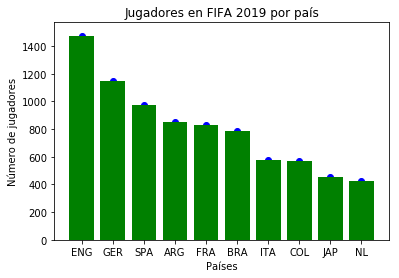

In [5]:
x = ('ENG', 'GER', 'SPA', 'ARG', 'FRA', 'BRA', 'ITA', 'COL', 'JAP', 'NL')
y = top_nacionalidad

plt.bar(x, y, color='g', align='center')
plt.scatter(x, y, color='b')
        
plt.title("Jugadores en FIFA 2019 por país")
plt.xlabel("Países")
plt.ylabel("Número de jugadores")
plt.show()

In [6]:
#Para la viualización utilizaré Seaborn, como vimos en el capítulo 05-Visualization_introduction (SEmana 3)
import seaborn as sns

# Muestro los 10 jugadoes con mayor puntuación global
df[df['Overall']>90][['Name','Overall', 'Age', 'Club', 'Nationality']]

,Name,Overall,Age,Club,Nationality
0,L. Messi,94,31,FC Barcelona,Argentina
1,Cristiano Ronaldo,94,33,Juventus,Portugal
2,Neymar Jr,92,26,Paris Saint-Germain,Brazil
3,De Gea,91,27,Manchester United,Spain
4,K. De Bruyne,91,27,Manchester City,Belgium
5,E. Hazard,91,27,Chelsea,Belgium
6,L. Modrić,91,32,Real Madrid,Croatia
7,L. Suárez,91,31,FC Barcelona,Uruguay
8,Sergio Ramos,91,32,Real Madrid,Spain


Text(0, 0.5, 'Puntuación media')

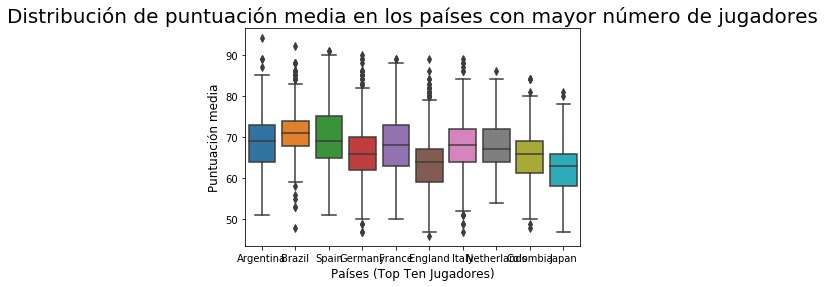

In [7]:
x = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Colombia', 'Japan', 'Netherlands')

#Para no mostrar todos los países nos quedamos con los jugadores que están en los Top 10 que hemos calculado antes
paises =  df.loc[df['Nationality'].isin(x)] 

# Mostramos los boxplot que muestra la distribución de la puntuación media
# de los 10 países con mayor número de jugadores en el juego
bp = sns.boxplot(x = paises['Nationality'], y = df['Overall'])
bp.set_title(label = 'Distribución de puntuación media en los países con mayor número de jugadores', fontsize = 20)
bp.set_xlabel(xlabel = 'Países (Top Ten Jugadores)', fontsize = 12)
bp.set_ylabel(ylabel = 'Puntuación media', fontsize = 12)

In [8]:
# Viendo los datos podemos ver como Brazil es el país los datos más concentrados y simétricos. 
# El 50% de los datos se encuentran entre 68 y 74 aproximadamente y la mediana se encuentra justo en la mitad (71).
# Los bigotes que representan tanto el 25% de la parte inferior como superior, tampoco están muy separados.
# Existen jugadores con valores fuera de esta distribución, considerados "valores atípicos" o "outliers"